# IFT6390: Final Project

The final project pertains to the problem of finding novel [antimicrobial peptides](https://en.wikipedia.org/wiki/Antimicrobial_peptides) (AMP) which may turn out to be key in the fight against antibiotics resistance. The World Health Organization qualifies antibiotic resistance as one of the [''biggest threats to global health, food security, and development today''](https://www.who.int/news-room/fact-sheets/detail/antibiotic-resistance).

Given the limited time frame of this project, I have scoped down the problems to two main tracks:

1. **Classification**: classifying protein sequences as AMP or non-AMP: a binary classification problem

    1.1 You are allowed to use Scikit-learn. You need to provide the following baselines: Random Forest, SVM, Neural Network. Use TF-IDF as a baseline feature extractor (you can use sklearn) for each of those.  
2. **Generation**: Given a corpus of AMP sequences, learn a character-level language model. You should implement a baseline using a Markov model. Then implement a sequential model using an RNN or LSTM. 

You should pick one of the two options. Choose your own adventure. You can work in teams of **three people max**.

---
Le projet final a trait au problème de découverte de [peptides antimicrobien](https://fr.wikipedia.org/wiki/Peptide_antimicrobien) qui pourraient s'avérer utile dans la bataille contre la résistance antibiotique. L'Organisation mondiale de la Santé estime que la résistance antibiotique est l'une des plus [grande menace à la santé globale, la sécurité alimentaire ainsi que le dévelopment de nos jours](https://www.who.int/news-room/fact-sheets/detail/antibiotic-resistance).

Étant donnée la durée limitée de ce projet, j'ai établi les deux directions de recherche suivantes: 

1. **Classification**: classifier les séquence de peptides antimicrobiens (AMPS) et non-antimicrobiens (non-AMP).

  1.1 Vous pouvez utiliser Scikit-learn. Vous devez toutefois fournir des points de comparaisons avec les algorithmes suivants: forêts aléatoires (random forest), SVM, réseaux de neurones. De plus, utilisez TF-IDF (scikit-learn) pour transformer les séquences de textes en vecteurs de charactéristiques.

2.**Modèle génératif**: étant donné un ensemble de séquences d'AMPs, apprendre un modèle de langage au niveaux des charactères. Vous devez également implémenter un modèle Markoviens pour fins de comparaison. Implémentez ensuite le modèle génératif avec un RNN ou un LSTM (voir démo de Viet). 

Vous devez choisir une des deux options. Vous pouvez travailler en équipe de trois personnes maximum. 







# Dataset

The dataset in this project comes from two open source projects: amPEPpy and AMPlify. 

---

L'ensemble de données provient des projets amPEPpy et AMPlify. 

In [3]:
!pip install biopython
!wget https://raw.githubusercontent.com/bcgsc/AMPlify/master/data/AMP_20190407.fa
!wget https://raw.githubusercontent.com/bcgsc/AMPlify/master/data/non_AMP_20190413.fa
!wget https://raw.githubusercontent.com/tlawrence3/amPEPpy/master/training_data/M_model_train_AMP_sequence.numbered.fasta
!wget https://raw.githubusercontent.com/tlawrence3/amPEPpy/master/training_data/M_model_train_nonAMP_sequence.numbered.fasta

Defaulting to user installation because normal site-packages is not writeable
--2021-04-25 04:57:24--  https://raw.githubusercontent.com/bcgsc/AMPlify/master/data/AMP_20190407.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166037 (162K) [text/plain]
Saving to: ‘AMP_20190407.fa’

AMP_20190407.fa     100%[===================>] 162.15K  --.-KB/s    in 0.05s   

2021-04-25 04:57:24 (3.13 MB/s) - ‘AMP_20190407.fa’ saved [166037/166037]

--2021-04-25 04:57:24--  https://raw.githubusercontent.com/bcgsc/AMPlify/master/data/non_AMP_20190413.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected

In [215]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [216]:
def fasta_to_str_set(name):
  return {str(rec.seq) for rec in SeqIO.parse(name, 'fasta')}

In [217]:
positive_examples = fasta_to_str_set('AMP_20190407.fa')
#.union(fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta'))
#positive_examples = fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta')
negative_examples = fasta_to_str_set('non_AMP_20190413.fa')
#.union(fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta'))
#negative_examples = fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta')

Once we have merged the two data sources, the positive class has:

---

Une fois les sources de données combinées, la classe positive a:

In [218]:
print(f"{len(positive_examples)} examples")

4173 examples


and the negative class (non-AMPs) has:

In [219]:
print(f"{len(negative_examples)} examples")

4173 examples


We have way more non-AMPs than AMP. This will be a challenge. Furthermore, the distribution of the sequence lengths varies a lot between the two classes. You should probably do something about this.

---

Nous avons également beaucoup plus de non-AMPs que d'AMPs. C'est là le défi. De plus, la distribution de la longeur des séquences varie beaucoup entre les deux classes. Vous devrez tenter de palier à ce problème. 

Text(0.5, 1.0, 'Negative Sequence Lengths')

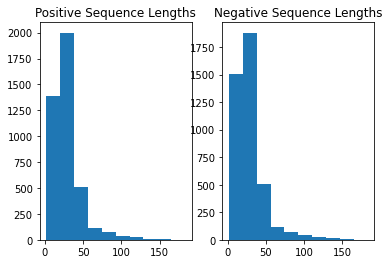

In [220]:
fig, axes = plt.subplots(1,2)
axes[0].hist([len(seq) for seq in positive_examples])
axes[0].set_title('Positive Sequence Lengths')
axes[1].hist([len(seq) for seq in negative_examples])
axes[1].set_title('Negative Sequence Lengths')

In [221]:
#positive_examples = fasta_to_str_set('AMP_20190407.fa')
#.union(fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta'))
#positive_examples = fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta')
#negative_examples = fasta_to_str_set('non_AMP_20190413.fa')
#.union(fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta'))
#negative_examples = fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta')

In [222]:
#print(f"{len(positive_examples)} examples")

In [223]:
#print(f"{len(negative_examples)} examples")

In [224]:
#fig, axes = plt.subplots(1,2)
#axes[0].hist([len(seq) for seq in positive_examples])
#axes[0].set_title('Positive Sequence Lengths')
#axes[1].hist([len(seq) for seq in negative_examples])
#axes[1].set_title('Negative Sequence Lengths')

Let's have a look at the data. For example, the first AMP in the dataset is: 

---

Jettons un coup d'oeil aux données. Le premier exemple d'AMP est:

In [225]:
list(positive_examples)[0]

'AVNIPFKVHFRCKAAFC'

This string describes the sequence of [amino acids](https://en.wikipedia.org/wiki/Amino_acid) present in the given AMP. There are $20$ possible such *standard* amino acids present in the genetic code. To know more about the meaning of each of those letter, see [this section](https://en.wikipedia.org/wiki/Amino_acid#Table_of_standard_amino_acid_abbreviations_and_properties) of the Wikipedia page on amino acids.

A non-AMP looks like:

---

Cette séquence décrit les amino acides présent dans l'AMP donné. Il y a $20$ aminos acides standard dans le code génétique. Pour en connaître plus sur la signification de chaque lettre, voir la page [wikipedia](https://en.wikipedia.org/wiki/Amino_acid#Table_of_standard_amino_acid_abbreviations_and_properties). 

In [226]:
list(negative_examples)[0]

'YRRRQCPPWCSGEPCRKGTC'

# Deliverables

You should provide a Colab notebook containing your code, figures and analysis. The code should be runnable and the figures reproducible. What I'm looking for in your report is to understand the thought process that led you to model your problem in a particular way. I want to see how you go about validating your results: discuss limitations, what can go wrong, what went wrong and how you addressed those issues. The final accuracy number is less important than how you got there. For each algorithm, also please provide a quick math overview of how it works under the hood.

The due date (firm) is April 30th. 

---

Vous devez remettre un cahier Colab contenant votre code, figures et analyses. Le code doit être exécutable et doit pouvoir reproduire les figures. Le point auquel sur lequel je vais m'attarder le plus est de comprendre le développement de vos idées. Je veux pouvoir comprendre comment vous avez validé vos résultats: en discutant les limitations, qu'est-ce qui peut mal tourner et comment s'attaquer aux problèmes. La précision finale du modèle est moins importante que l'analyse de votre approche elle-même. Pour chaque algorithme, veuillez également fournir un survol mathématique des concepts principaux. 

La date finale (ferme) est le 30 avril. 

# Dataset

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [228]:
def dummy(doc):
    return doc

In [229]:
vectorizer = TfidfVectorizer(tokenizer=dummy,preprocessor=dummy,lowercase=False)     

In [230]:
X1 = vectorizer.fit_transform(positive_examples)
print(X1.shape)
features1 = vectorizer.get_feature_names()
print(len(positive_examples))
print(len(features))

(4173, 20)
4173
20


In [231]:
list(positive_examples)[1]

'GFGPAFHSVSNFAKKHKTA'

In [232]:
print(features1)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [233]:
X2 = vectorizer.fit_transform(negative_examples)
print(X2.shape)
features2 = vectorizer.get_feature_names()
print(len(negative_examples))
print(len(features2))

(4173, 20)
4173
20


In [234]:
print(features1)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


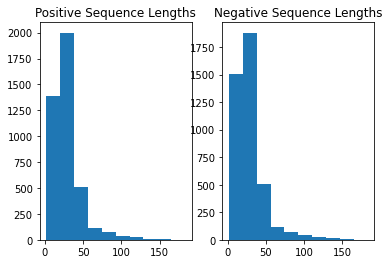

In [235]:
fig, axes = plt.subplots(1,2)
axes[0].hist([len(seq) for seq in positive_examples])
axes[0].set_title('Positive Sequence Lengths')
axes[1].hist([len(seq) for seq in negative_examples])
axes[1].set_title('Negative Sequence Lengths')
plt.show()

In [285]:
import pandas as pd 
df_orig_p=pd.DataFrame(positive_examples,columns=['Sequence'])
df_orig_p['Label']=1
df_orig_p['SqLen'] = np.array([len(seq) for seq in positive_examples])
df_orig_n=pd.DataFrame(negative_examples,columns=['Sequence'])
df_orig_n['SqLen'] = np.array([len(seq) for seq in negative_examples])
df_orig_n['Label']=0

df=pd.DataFrame()
df=df.append(df_orig_p,ignore_index=True)
df=df.append(df_orig_n,ignore_index=True)
print(df.shape)

(8346, 3)


In [286]:
df.columns

Index(['Sequence', 'Label', 'SqLen'], dtype='object')

In [287]:
df.head()

,Sequence,Label,SqLen
0,AVNIPFKVHFRCKAAFC,1,17
1,GFGPAFHSVSNFAKKHKTA,1,19
2,ELPKLPDDKVLIRSRSNCPKGKVWNGFDCKSPFAFS,1,36
3,FLPIIGKLLSG,1,11
4,KPAWCWYTLAMCGAGYDSGTCDYMYSHCFGIKHHSSGSSSYHC,1,43


In [288]:
len("MSKLVQAISDAVQAGQNQDWAKLGTSIVGIVENGVGILGKLFGF")

44

In [289]:
len("AVNIPFKVHFRCKAAFC")

17

In [290]:
# pre processing data
def cleanData(sentence):
    # Tokenize sequence to charecters
    sentence=list(sentence)
    return sentence

df['Sequence']  = df['Sequence'] .map(lambda x: cleanData(x))

In [291]:
X = df.Sequence
y = df.Label

In [307]:
X.head()

0    [A, V, N, I, P, F, K, V, H, F, R, C, K, A, A, ...
1    [G, F, G, P, A, F, H, S, V, S, N, F, A, K, K, ...
2    [E, L, P, K, L, P, D, D, K, V, L, I, R, S, R, ...
3                    [F, L, P, I, I, G, K, L, L, S, G]
4    [K, P, A, W, C, W, Y, T, L, A, M, C, G, A, G, ...
Name: Sequence, dtype: object

In [308]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [302]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True)

In [294]:
def dummy(doc):
    return doc

tfidf = TfidfVectorizer(tokenizer=dummy,preprocessor=dummy,lowercase=False)    

In [295]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [310]:
tfidf.get_feature_names()

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [311]:
len(tfidf.get_feature_names())

20

In [296]:
rfs = RandomForestClassifier()

rfs.fit(X_train,y_train)

y_pred = rfs.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       835
           1       0.90      0.85      0.87       835

    accuracy                           0.88      1670
   macro avg       0.88      0.88      0.88      1670
weighted avg       0.88      0.88      0.88      1670



In [312]:
#positive_examples = fasta_to_str_set('AMP_20190407.fa')
#.union(fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta'))
positive_examples = fasta_to_str_set('M_model_train_AMP_sequence.numbered.fasta')
#negative_examples = fasta_to_str_set('non_AMP_20190413.fa')
#.union(fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta'))
negative_examples = fasta_to_str_set('M_model_train_nonAMP_sequence.numbered.fasta')

Text(0.5, 1.0, 'Negative Sequence Lengths')

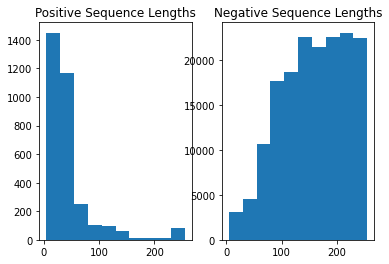

In [313]:
fig, axes = plt.subplots(1,2)
axes[0].hist([len(seq) for seq in positive_examples])
axes[0].set_title('Positive Sequence Lengths')
axes[1].hist([len(seq) for seq in negative_examples])
axes[1].set_title('Negative Sequence Lengths')

In [314]:
df_orig_p1 = pd.DataFrame(positive_examples,columns=['Sequence'])
df_orig_p1['Label'] = 1
df_orig_p1['SqLen'] = np.array([len(seq) for seq in positive_examples])

df_orig_n1 = pd.DataFrame(negative_examples,columns=['Sequence'])
df_orig_n1['SqLen'] = np.array([len(seq) for seq in negative_examples])
df_orig_n1['Label'] = 0

df1 = pd.DataFrame()
df1 = df1.append(df_orig_p1,ignore_index=True)
df1 = df1.append(df_orig_n1,ignore_index=True)
print(df1.shape)

(170059, 3)


In [315]:
df1['Sequence']  = df1['Sequence'] .map(lambda x: cleanData(x))

X = df1.Sequence
y = df1.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [316]:
tfidf.get_feature_names()

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [317]:
len(tfidf.get_feature_names())

20

In [318]:
rfs = RandomForestClassifier()

rfs.fit(X_train,y_train)

y_pred = rfs.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33358
           1       0.70      0.50      0.58       654

    accuracy                           0.99     34012
   macro avg       0.84      0.75      0.79     34012
weighted avg       0.98      0.99      0.99     34012



In [241]:
df2 = df[df['SqLen'] < 201]
df2.reset_index(drop=True, inplace=True)
df2

,Sequences,Labels,SqLen
0,AVNIPFKVHFRCKAAFC,1,17
1,GFGPAFHSVSNFAKKHKTA,1,19
2,ELPKLPDDKVLIRSRSNCPKGKVWNGFDCKSPFAFS,1,36
3,FLPIIGKLLSG,1,11
4,KPAWCWYTLAMCGAGYDSGTCDYMYSHCFGIKHHSSGSSSYHC,1,43
...,...,...,...
8341,KNWAVLVAGSDGLPNYRHHADV,0,22
8342,SCADAYKSCDSLKCCNNRTCMCSMIGTNCTCRKK,0,34
8343,VAILGAAGGIGQPLSLLMKDDLFNINAGIVK,0,31
8344,VVSCADILAVAAR,0,13


Text(0.5, 1.0, 'Negative Sequence Lengths')

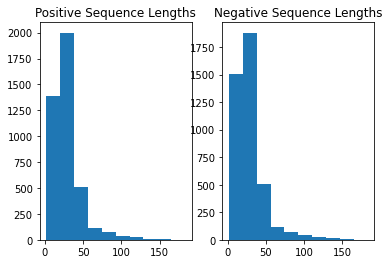

In [242]:
fig, axes = plt.subplots(1,2)
axes[0].hist(df2[df2['Labels'] == 1].SqLen)
axes[0].set_title('Positive Sequence Lengths')
axes[1].hist(df2[df2['Labels'] == 0].SqLen)
axes[1].set_title('Negative Sequence Lengths')

Keep Test data seperate

Try score function from amPEPpy

# Code from https://github.com/tlawrence3/amPEPpy/blob/master/amPEPpy/amPEP.py
from datetime import date

def score(fasta_handle):
    CTD = {'hydrophobicity': {1: ['R', 'K', 'E', 'D', 'Q', 'N'], 2: ['G', 'A', 'S', 'T', 'P', 'H', 'Y'], 3: ['C', 'L', 'V', 'I', 'M', 'F', 'W']},
           'normalized.van.der.waals': {1: ['G', 'A', 'S', 'T', 'P', 'D', 'C'], 2: ['N', 'V', 'E', 'Q', 'I', 'L'], 3: ['M', 'H', 'K', 'F', 'R', 'Y', 'W']},
           'polarity': {1: ['L', 'I', 'F', 'W', 'C', 'M', 'V', 'Y'], 2: ['P', 'A', 'T', 'G', 'S'], 3: ['H', 'Q', 'R', 'K', 'N', 'E', 'D']},
           'polarizability': {1: ['G', 'A', 'S', 'D', 'T'], 2: ['C', 'P', 'N', 'V', 'E', 'Q', 'I', 'L'], 3: ['K', 'M', 'H', 'F', 'R', 'Y', 'W']},
           'charge': {1: ['K', 'R'], 2: ['A', 'N', 'C', 'Q', 'G', 'H', 'I', 'L', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'], 3: ['D', 'E']},
           'secondary': {1: ['E', 'A', 'L', 'M', 'Q', 'K', 'R', 'H'], 2: ['V', 'I', 'Y', 'C', 'W', 'F', 'T'], 3: ['G', 'N', 'P', 'S', 'D']},
           'solvent': {1: ['A', 'L', 'F', 'C', 'G', 'I', 'V', 'W'], 2: ['R', 'K', 'Q', 'E', 'N', 'D'], 3: ['M', 'S', 'P', 'T', 'H', 'Y']}}
    header = []
    groups = [1, 2, 3]
    values = [0, 25, 50, 75, 100]
    for AAproperty in CTD:
        for types in groups:
            for numbers in values:
                label = ""
                label = label.join("{}.{}.{}".format(AAproperty, types, numbers))
                header.append(label)
    All_groups = []
    Sequence_names = []
    for sequences in SeqIO.parse(fasta_handle, "fasta"):
        sequence_name = sequences.id
        Sequence_names.append(sequence_name)
        sequence = str(sequences.seq)
        sequence=sequence.replace("*","")
        sequencelength=len(sequence)
        Sequence_group = []
        for AAproperty in CTD:
            propvalues = ""
            for letter in sequence:
                if letter in CTD[AAproperty][1]:
                    propvalues += "1"
                elif letter in CTD[AAproperty][2]:
                    propvalues += "2"
                elif letter in CTD[AAproperty][3]:
                    propvalues += "3"
            abpos_1 = [i for i in range(len(propvalues)) if propvalues.startswith("1", i)]
            abpos_1 = [x+1 for x in abpos_1]
            abpos_1.insert(0, "-")
            abpos_2 = [i for i in range(len(propvalues)) if propvalues.startswith("2", i)]
            abpos_2 = [x+1 for x in abpos_2]
            abpos_2.insert(0, "-")
            abpos_3 = [i for i in range(len(propvalues)) if propvalues.startswith("3", i)]
            abpos_3 = [x+1 for x in abpos_3]
            abpos_3.insert(0, "-")
            property_group1_length = propvalues.count("1")
            if property_group1_length == 0:
                Sequence_group.extend([0, 0, 0, 0, 0])
            elif property_group1_length == 1:
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
            elif property_group1_length == 2:
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[round((0.5*property_group1_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_1[round((0.75*property_group1_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_1[property_group1_length]/sequencelength)*100)
            else:
                Sequence_group.append((abpos_1[1]/sequencelength)*100)
                Sequence_group.append((abpos_1[round((0.25*property_group1_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_1[round((0.5*property_group1_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_1[round((0.75*property_group1_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_1[property_group1_length]/sequencelength)*100)

            property_group2_length = propvalues.count("2")
            if property_group2_length == 0:
                Sequence_group.extend([0, 0, 0, 0, 0])
            elif property_group2_length == 1:
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
            elif property_group2_length == 2:
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[round((0.5*property_group2_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_2[round((0.75*property_group2_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_2[property_group2_length]/sequencelength)*100)
            else:
                Sequence_group.append((abpos_2[1]/sequencelength)*100)
                Sequence_group.append((abpos_2[round((0.25*property_group2_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_2[round((0.5*property_group2_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_2[round((0.75*property_group2_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_2[property_group2_length]/sequencelength)*100)

            property_group3_length = propvalues.count("3")
            if property_group3_length == 0:
                Sequence_group.extend([0, 0, 0, 0, 0])
            elif property_group3_length == 1:
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
            elif property_group3_length == 2:
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[round((0.5*property_group3_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_3[round((0.75*property_group3_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_3[property_group3_length]/sequencelength)*100)
            else:
                Sequence_group.append((abpos_3[1]/sequencelength)*100)
                Sequence_group.append((abpos_3[round((0.25*property_group3_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_3[round((0.5*property_group3_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_3[round((0.75*property_group3_length)-0.1)]/sequencelength)*100)
                Sequence_group.append((abpos_3[property_group3_length]/sequencelength)*100)
        All_groups.append(Sequence_group)

    Property_dataframe = pd.DataFrame.from_dict(All_groups)
    Property_dataframe.columns = header
    Property_dataframe.index = Sequence_names
    Property_dataframe.to_csv(f'{date.today().strftime("%Y%m%d")}_scored_features.csv', index=True, index_label="sequence_name")
    return Property_dataframe

score('AMP_20190407.fa')

score('M_model_train_AMP_sequence.numbered.fasta')

score('non_AMP_20190413.fa')

score('M_model_train_nonAMP_sequence.numbered.fasta')